#### Importing libraries

In [95]:
# pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation:
import matplotlib.pyplot as plt

# An array object of arbitrary homogeneous items
# Fast mathematical operations over arrays
# Linear Algebra, Fourier Transforms, Random Number Generation
import numpy as np

import seaborn as sns
import pandas as pd

# sklearn is a Python module integrating classical machine learning algorithms in the tightly-knit world of scientific Python packages (numpy, scipy, matplotlib).
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# The sklearn.tree module includes decision tree-based models for classification and regression.
from sklearn import tree

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics and distance computations.
from sklearn import metrics

#### Loading dataset

In [96]:
df_iris_flower = pd.read_csv('iris_flower.csv')

#### Checking dataset shape

In [97]:
print ('Data Shape: ', df_iris_flower.shape)

Data Shape:  (1050, 5)


#### Data Information

In [98]:
df_iris_flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  1047 non-null   float64
 1   sepal_width   1045 non-null   float64
 2   petal_length  1032 non-null   float64
 3   petal_width   1044 non-null   float64
 4   species       1050 non-null   object 
dtypes: float64(4), object(1)
memory usage: 41.1+ KB


#### Descriptive statistics

In [99]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

df_iris_flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1047.000000,1045.000000,1032.000000,1044.000000
mean,5.844604,3.054545,3.755523,1.203736
std,0.826432,0.432815,1.762083,0.760125
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking missing data

In [100]:
df_iris_flower.isnull().sum()

sepal_length     3
sepal_width      5
petal_length    18
petal_width      6
species          0
dtype: int64

#### Replacing missing data with the mean of the existing data

In [101]:
# petal_width (cm)
df_iris_flower['petal_width'].fillna(df_iris_flower['petal_width'].mean(), inplace=True)

# sepal_length (cm)
df_iris_flower['sepal_length'].fillna(df_iris_flower['sepal_length'].mean(), inplace=True)

# sepal_width (cm)
df_iris_flower['sepal_width'].fillna(df_iris_flower['sepal_width'].mean(), inplace=True)

# petal_length (cm)
df_iris_flower['petal_length'].fillna(df_iris_flower['petal_length'].mean(), inplace=True)


df_iris_flower.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Plotting Dataset

In [102]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

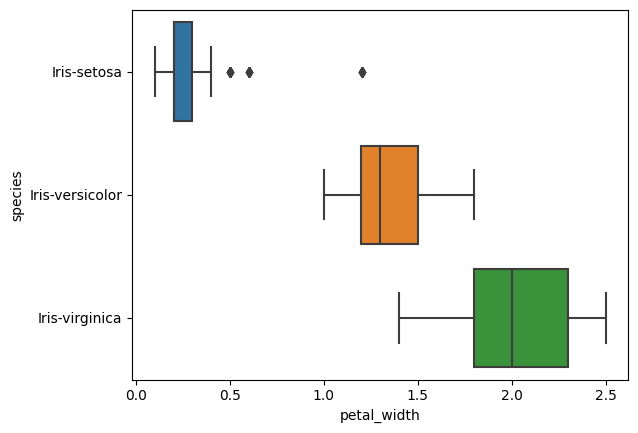

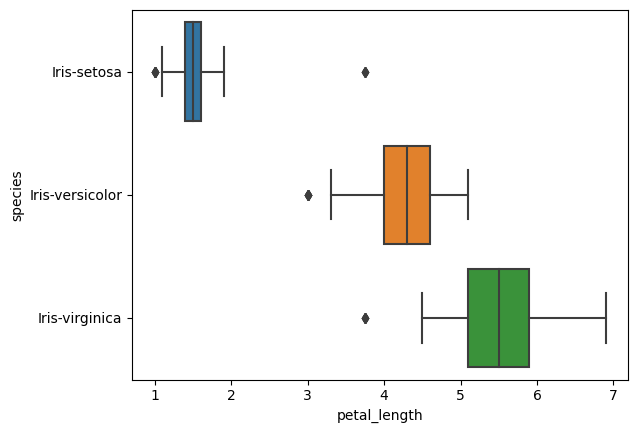

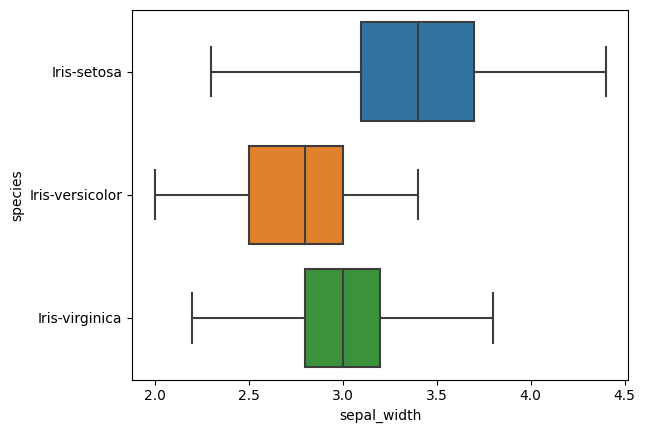

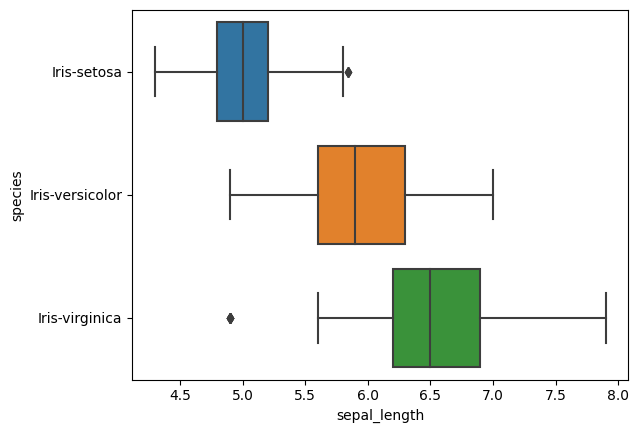

In [103]:
for i, x_feature in enumerate(['petal_width', 'petal_length', 'sepal_width', 'sepal_length']):
    plt.figure(i)
    ax = sns.boxplot(data = df_iris_flower, x = x_feature, y = 'species')

#### Converting data under sepcies column name to a numeric data

#### Turn species into a binary classification task

Replacing all versicolors with the value of 0.

Replacing all virginica with the value of 1. 

For all versicolors, species == 0

For all virginica, species == 1

In [104]:
# import numpy as np

# # where(condition, [x, y])
# # Return elements chosen from x or y depending on condition

# df_iris_flower['species'] = np.where(df_iris_flower['species'] == 'versicolor', 0, 1)

# df_iris_flower

#### Plot pairwise relationships in a dataset.

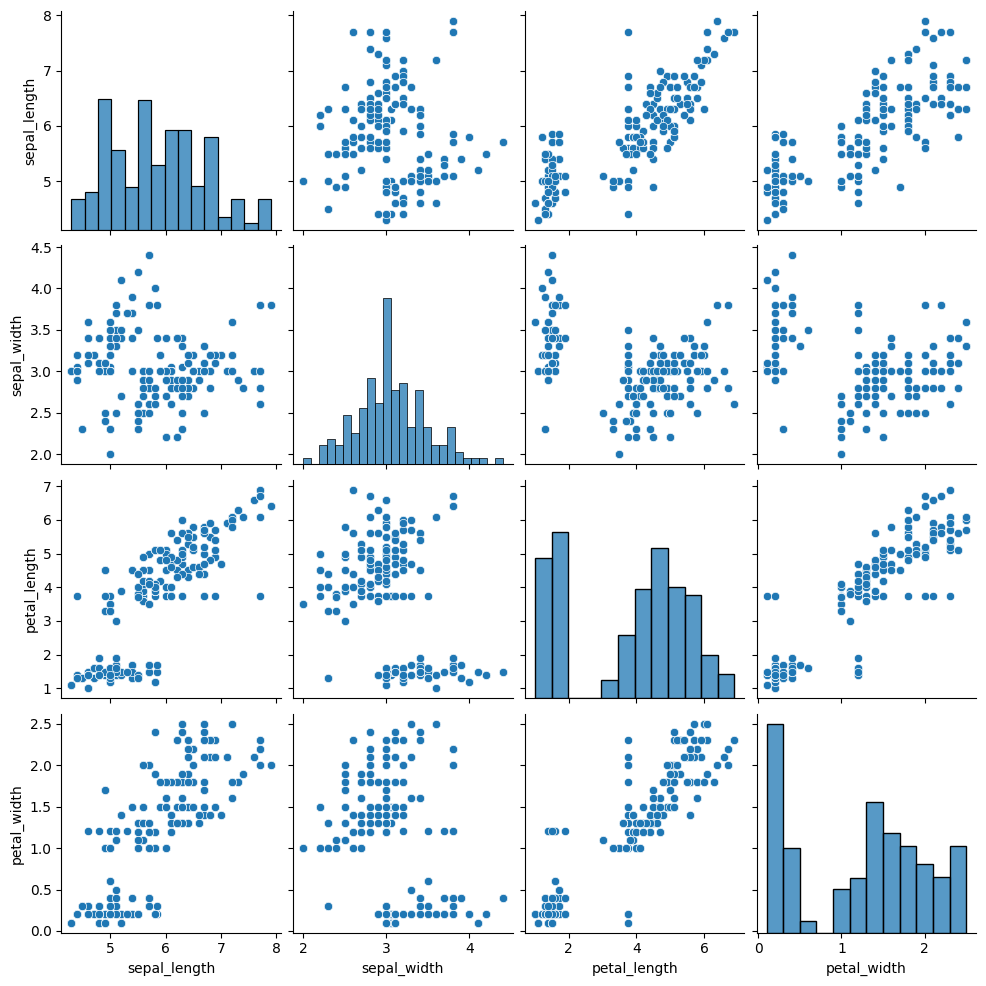

In [105]:
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes
# across a single row and the x-axes across a single column. The diagonal plots are treated

import seaborn as sb

sb.pairplot(df_iris_flower)

#### Defining the dependent (target, label, y) and independent (features, x) variables

In [106]:
df_features = df_iris_flower.drop('species', axis=1)
df_labels = df_iris_flower['species']

# DataFrame
df_features


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
1045,6.7,3.0,5.2,2.3
1046,6.3,2.5,5.0,1.9
1047,6.5,3.0,5.2,2.0
1048,6.2,3.4,5.4,2.3


In [107]:
# Series
df_labels

0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
             ...      
1045    Iris-virginica
1046    Iris-virginica
1047    Iris-virginica
1048    Iris-virginica
1049    Iris-virginica
Name: species, Length: 1050, dtype: object

#### Splitting data into training and test sets

In [108]:
x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, random_state=0)

#### Checking data shape

In [109]:
x_train.shape, x_test.shape

((787, 4), (263, 4))

#### Checking x_train

In [110]:
x_train.head(),  

(     sepal_length  sepal_width  petal_length  petal_width
 957           4.9          2.4           3.3          1.0
 158           4.4          2.9           1.4          0.2
 40            5.0          3.5           1.3          0.3
 995           5.7          3.0           4.2          1.2
 440           6.7          3.1           5.6          2.4,)

#### Checking y_train

In [111]:
y_train.head()

957    Iris-versicolor
158        Iris-setosa
40         Iris-setosa
995    Iris-versicolor
440     Iris-virginica
Name: species, dtype: object

#### Train and evaluate the Classification Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

dtc = DecisionTreeClassifier(random_state = 1234)
dt_model1 = dtc.fit(x_train, y_train)

#### Chekcing score

In [113]:
dt_model1.score(x_train, y_train)

1.0

In [114]:
dt_model1.score(x_test, y_test)

0.9961977186311787

#### Visualize the Classification Tree

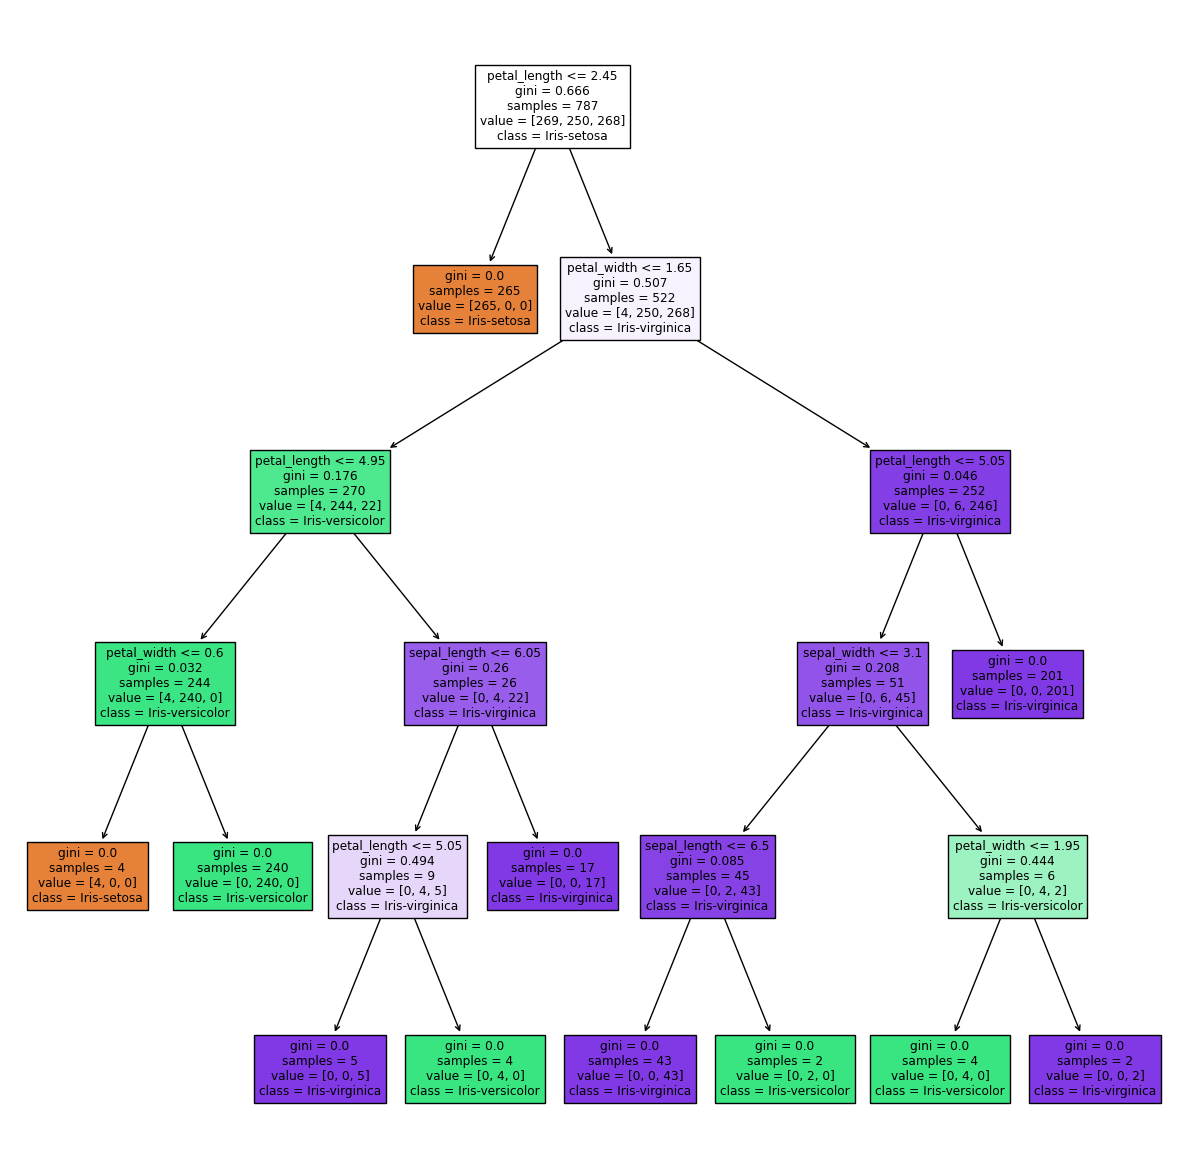

In [115]:


plt.figure(figsize = (15,15))
tree.plot_tree(dt_model1, 
                   feature_names = list(x_train.columns), 
                   class_names = ['Iris-setosa','Iris-versicolor', 'Iris-virginica'],
                   filled = True);

#### Checking feature importance 

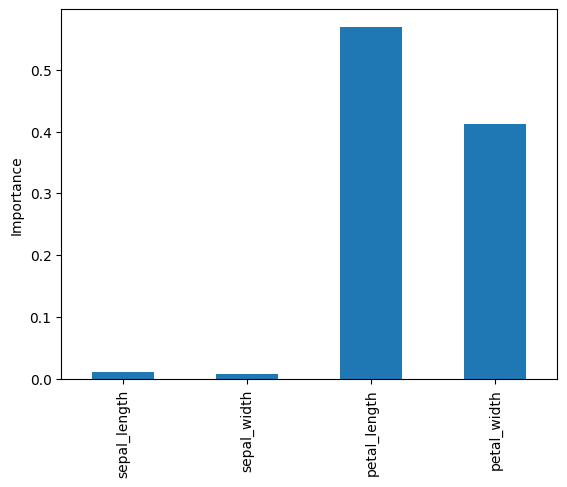

In [116]:
# Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature.
# A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable

# Return the feature importances.
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
# It is also known as the Gini importance.

importance = dt_model1.feature_importances_
feature_importance = pd.Series(importance, index = df_features.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

#### Prune the Classification Tree

In [117]:
# Function to print out results in detail

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean, std, param in zip(means, stds, params):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), param))

In [118]:
grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': range(1, 7)}

In [119]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
dt_model2 = gcv.fit(x_train, y_train)

# printing results
print_results(gcv)

BEST PARAMS: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 4}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.957 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 4, 'min_sample

#### 

In [120]:
dt_model2 = gcv.best_estimator_
dt_model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [121]:
import joblib

joblib.dump(gcv.best_estimator_, 'DT_model.pkl')

['DT_model.pkl']

#### Checking score

In [122]:
dt_model2.score(x_train, y_train)

1.0

In [123]:
dt_model2.score(x_test, y_test)

0.9961977186311787

#### Visualize the Classification Tree for train data set

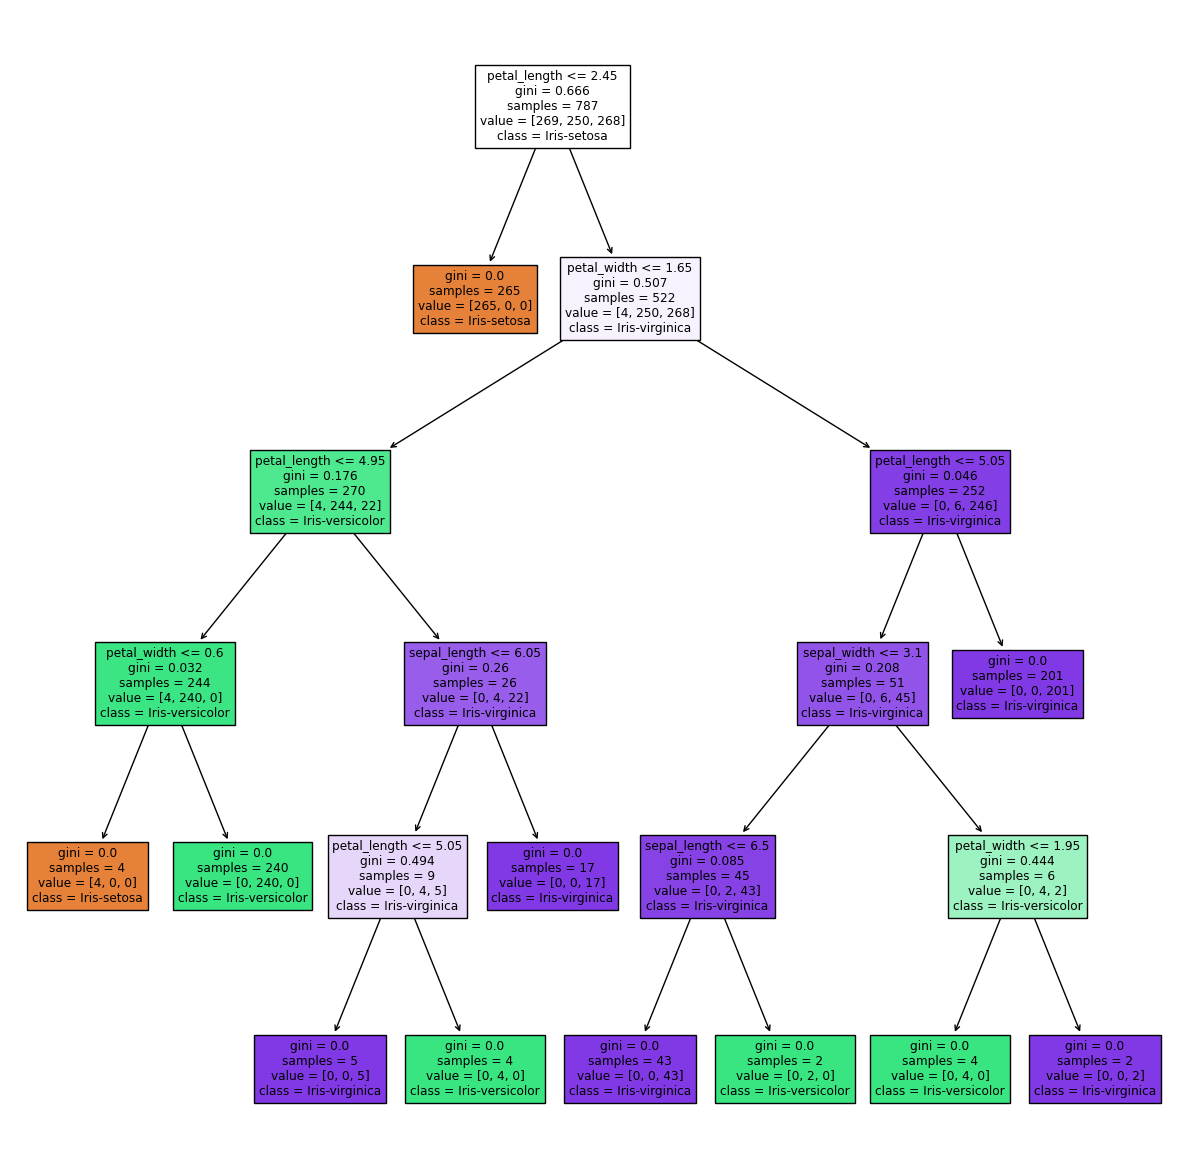

In [124]:
plt.figure(figsize = (15,15))
tree.plot_tree(dt_model2, 
                   feature_names = list(x_train.columns), 
                   class_names = ['Iris-setosa','Iris-versicolor', 'Iris-virginica'],
                   filled = True);

### Evaluate models on the test set

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [126]:
import joblib

# To get all models best estimetors if there are more then one

models = {}

for mdl in ['DT']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))
    
models

{'DT': DecisionTreeClassifier(max_depth=5, random_state=1234)}

In [127]:
# Evaluate decision tree model on test test set

for name, mdl in models.items():
    evaluate_model(name, mdl, x_test, y_test)

DT -- Accuracy: 0.996 / Precision: 0.996 / Recall: 0.996 / Latency: 3.5ms


#### Visualize the Classification Tree for test data set

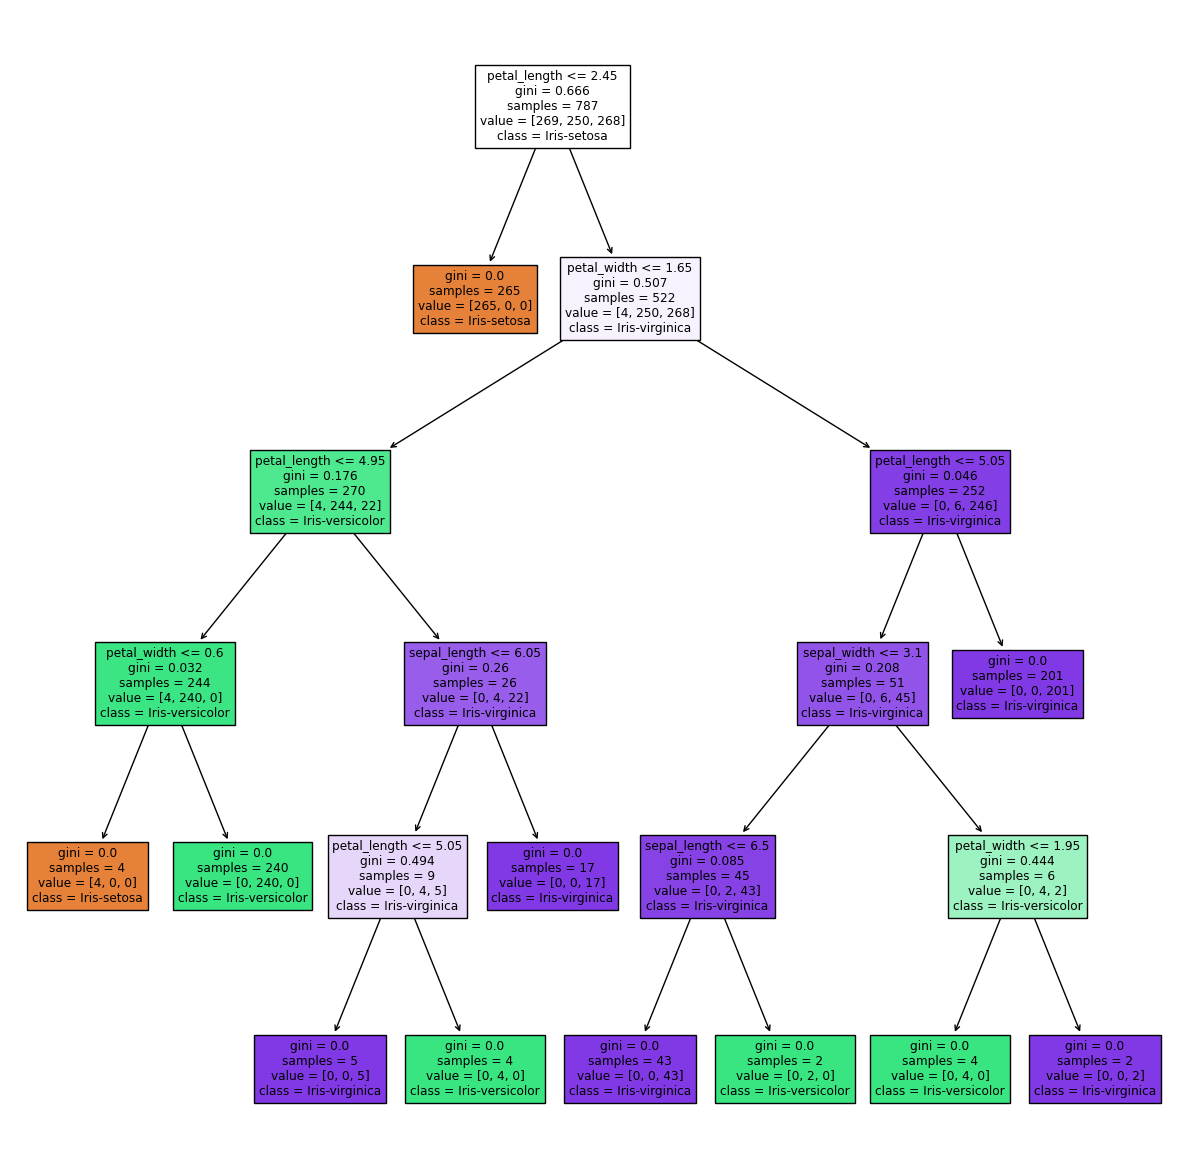

In [128]:
plt.figure(figsize = (15,15))
tree.plot_tree(dt_model2, 
                   feature_names = list(x_test.columns), 
                   class_names = ['Iris-setosa','Iris-versicolor', 'Iris-virginica'],
                   filled = True);